In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt 
import numpy as np 
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np. random.seed (seed)
tf. random.set_seed (seed)

In [4]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# input_shape=(행, 열, 색상 또는 흑백) 형식. 입력 이미지가 색상이면 3, 흑백이면 1 #즉 CNN을 쓰기 전에는 1차원 배열로 만들어 주었지만 CNN에서는 image 정보를 그대로 살림
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1). astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [5]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
# 모델 최적화 설정
MODEL_DIR = 'model/' 
if not os.path.exists(MODEL_DIR):
    os.mkdir (MODEL_DIR)
modelpath="model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                                save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.05253, saving model to model/01-0.0525.keras

Epoch 2: val_loss improved from 0.05253 to 0.03789, saving model to model/02-0.0379.keras

Epoch 3: val_loss improved from 0.03789 to 0.03183, saving model to model/03-0.0318.keras

Epoch 4: val_loss did not improve from 0.03183

Epoch 5: val_loss improved from 0.03183 to 0.03081, saving model to model/05-0.0308.keras

Epoch 6: val_loss did not improve from 0.03081

Epoch 7: val_loss improved from 0.03081 to 0.03041, saving model to model/07-0.0304.keras

Epoch 8: val_loss improved from 0.03041 to 0.02932, saving model to model/08-0.0293.keras

Epoch 9: val_loss did not improve from 0.02932

Epoch 10: val_loss did not improve from 0.02932

Epoch 11: val_loss did not improve from 0.02932

Epoch 12: val_loss did not improve from 0.02932

Epoch 13: val_loss did not improve from 0.02932

Epoch 14: val_loss did not improve from 0.02932

Epoch 15: val_loss did not improve from 0.02932

Epoch 16: val_loss 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9871 - loss: 0.0501

 Test Accuracy: 0.9898


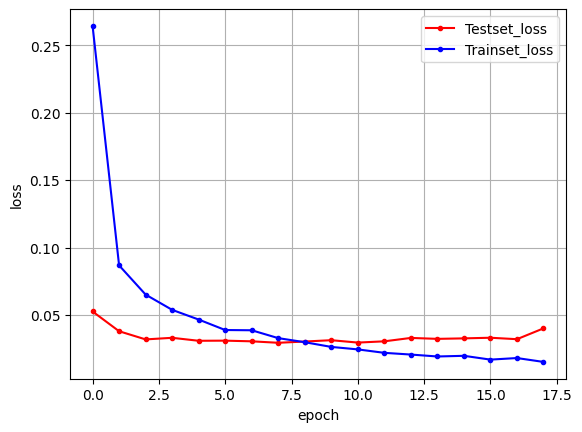

In [7]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend (loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

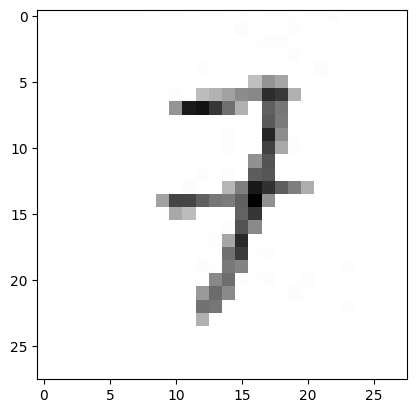

The Answer of J is 7


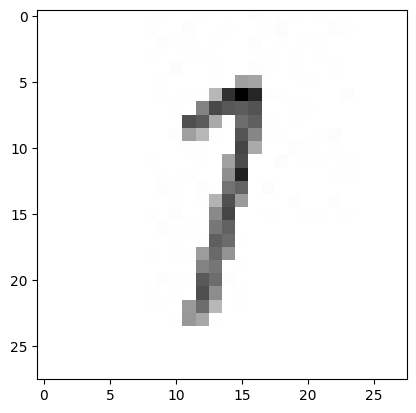

The Answer of H is 1


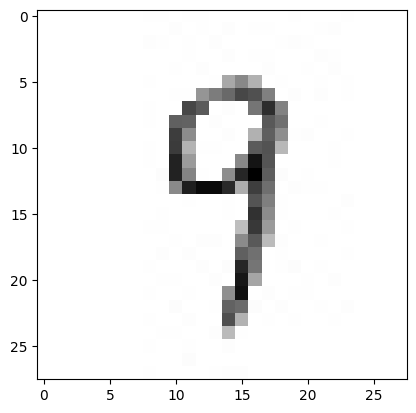

The Answer of I is 9


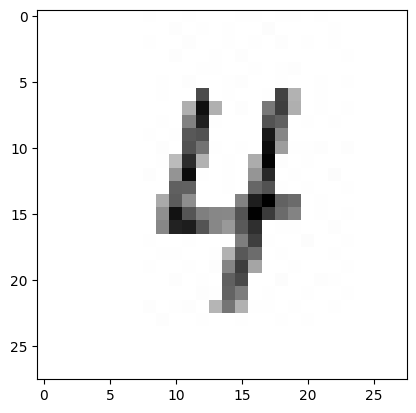

The Answer of B is 4


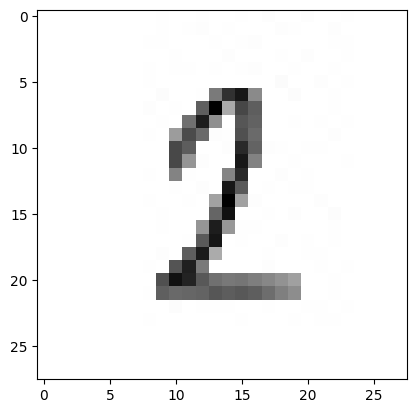

The Answer of C is 2


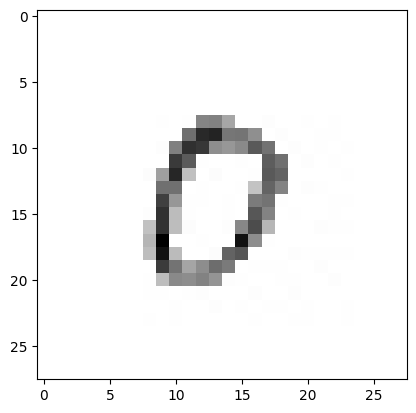

The Answer of A is 0


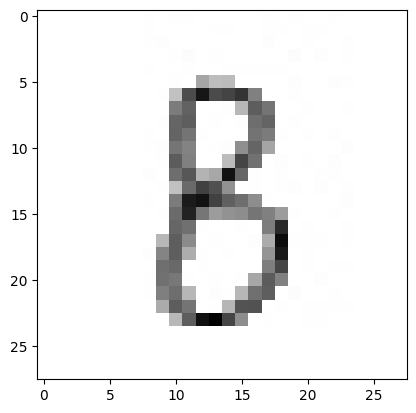

The Answer of D is 8


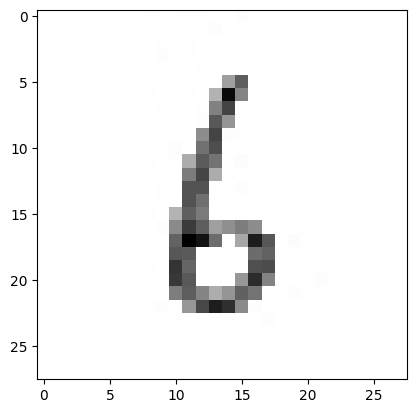

The Answer of E is 6


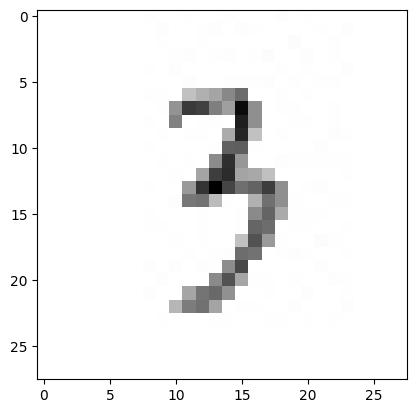

The Answer of G is 3


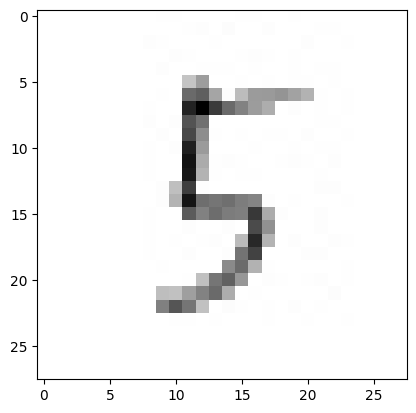

The Answer of F is 5


In [14]:
import tensorflow as tf
import sys 
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np
import cv2
model = load_model('model/08-0.0293.keras')
#model = load_model('/content/model_cnn/15-0.0595.hdf5')#colab₫ 79
model.summary

from glob import glob
import pathlib
img_path = 'images'
file_list = glob(img_path + "/*")

for pic in file_list:
    test_num = cv2.imread(pic)
    test_num = cv2.cvtColor(test_num, cv2.COLOR_BGR2GRAY)
    test_num = 255 - test_num
    plt. imshow(test_num, cmap='Greys');
    plt.show()

    test_num = test_num.reshape(1, 28, 28, 1).astype('float64') / 255
    test_predict = model.predict(test_num, verbose=0)
    name = pathlib.Path(pic).stem
    print( 'The Answer of', name ,'is', test_predict.argmax())
